In [1]:
belgium <- readr::read_csv("https://epistat.wiv-isp.be/data/public_cases.csv")

Parsed with column specification:
cols(
  Age = col_integer(),
  DateMonday = col_date(format = ""),
  Gender = col_character(),
  Subject = col_character(),
  NUTS2 = col_integer()
)
Warning message in rbind(names(probs), probs_f):
“number of columns of result is not a multiple of vector length (arg 1)”Warning message:
“16 parsing failures.
row # A tibble: 5 x 5 col     row col   expected               actual      file                           expected   <int> <chr> <chr>                  <chr>       <chr>                          actual 1 24452 Age   no trailing characters .5799560547 'https://epistat.wiv-isp.be/d… file 2 24808 Age   no trailing characters .0799865723 'https://epistat.wiv-isp.be/d… row 3 28992 Age   no trailing characters .0799865723 'https://epistat.wiv-isp.be/d… col 4 36042 Age   no trailing characters .0799865723 'https://epistat.wiv-isp.be/d… expected 5 68420 Age   no trailing characters .75         'https://epistat.wiv-isp.be/d…
... ................. ... ......

In [2]:
dim(belgium)

[1] 295320      5

In [3]:
knitr::kable(head(belgium))



| Age|DateMonday |Gender |Subject | NUTS2|
|---:|:----------|:------|:-------|-----:|
|  63|2008-01-07 |F      |BRRBUR  |    32|
|  58|2008-01-07 |F      |STRPYO  |    23|
|   0|2008-01-07 |U      |V_RSV   |    22|
|   1|2008-01-07 |M      |V_RSV   |    23|
|  43|2008-01-07 |F      |CHLTRA  |    21|
|   0|2008-01-07 |F      |V_RSV   |    21|

In [45]:
belgium_sts <- function(disease, data){
  
  # filter the chosen disease
  disease_data <- dplyr::filter_(data, paste0("Subject == \"",disease,"\""))

  # aggregated cases by week to get the weekly number of cases
  observed <- dplyr::group_by(disease_data, DateMonday)
  observed <- dplyr::summarize(observed, n_cases = n())

  # create the sts object
  disease_sts <- surveillance::sts(observed = observed$n_cases, # weekly number of cases
                                    start = c(min(lubridate::year(observed$DateMonday)), 01), # first week of the time series
                                    frequency = 52, # weekly data
                                    epochAsDate = TRUE, # we do have dates, not only index
                                    epoch = as.numeric(observed$DateMonday) # here are the dates
                                    )

  disease_sts
}

In [52]:
library(dplyr)
disease_data <- dplyr::filter_(belgium, paste0("Subject == \"","SALM","\""))

In [54]:
observed <- dplyr::group_by(disease_data, DateMonday)

In [56]:
observed <- dplyr::summarize(observed, n_cases = n())

In [57]:
observed

DateMonday,n_cases
2008-01-07,41
2008-01-14,72
2008-01-21,53
2008-01-28,62
2008-02-04,43
2008-02-11,77
2008-02-18,68
2008-02-25,75
2008-03-03,70
2008-03-10,45


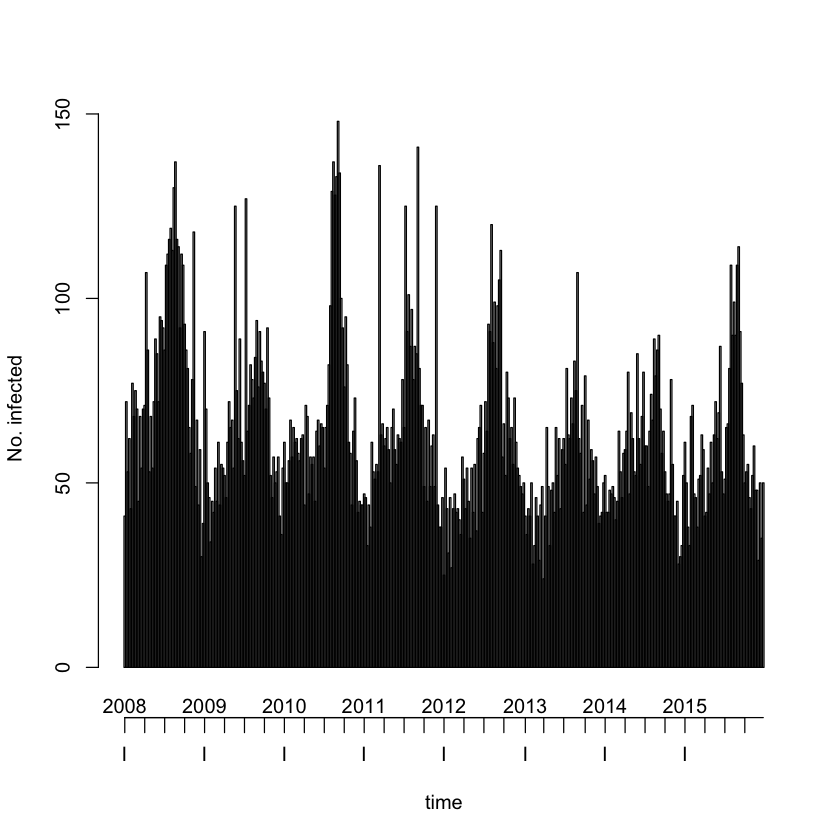

In [58]:
library(surveillance)
salmonella <- belgium_sts(disease = "SALM", data = belgium)
plot(salmonella)


In [59]:
salmonella

-- An object of class sts -- 
freq:		 52 with strptime format string %V
start:		 2008-01-07 
dim(observed):	 417 1 

Head of observed:
     observed1
[1,]        41

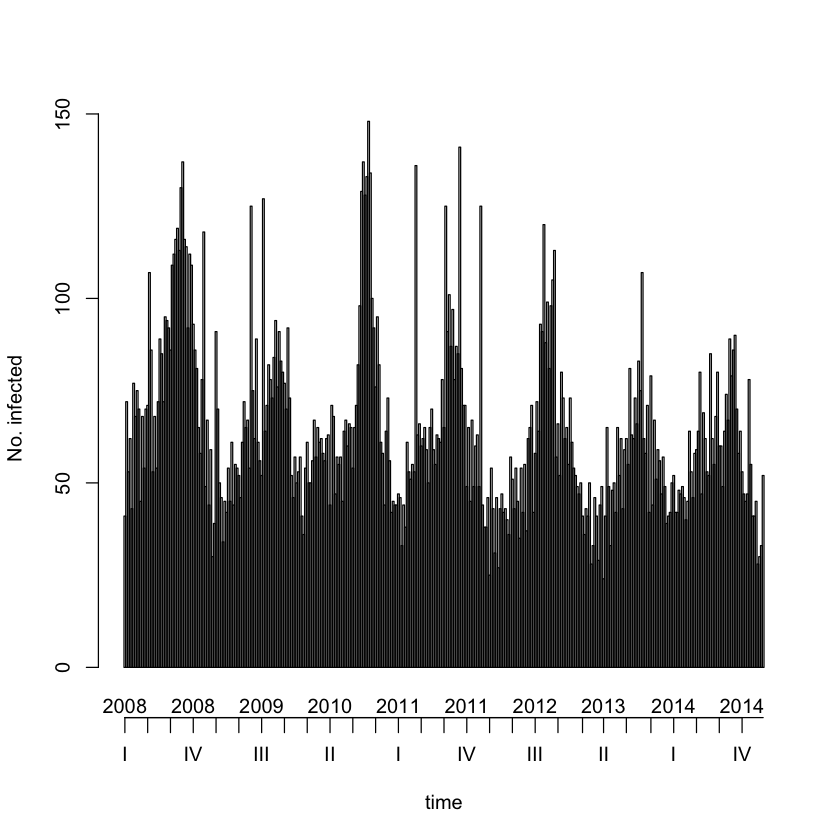

In [15]:
salmonella2014 <- salmonella[salmonella@epoch < lubridate::ymd("2015-01-01")]
plot(salmonella2014)

In [42]:
no_of_weeks <- length(salmonella2014@observed)
monitored_salmonella2014 <- earsC(salmonella2014,
                                  control = list(range = c((no_of_weeks - 5): no_of_weeks),
                                                 method = "C1",
                                                 alpha = 0.05,
                                                 baseline = 5))

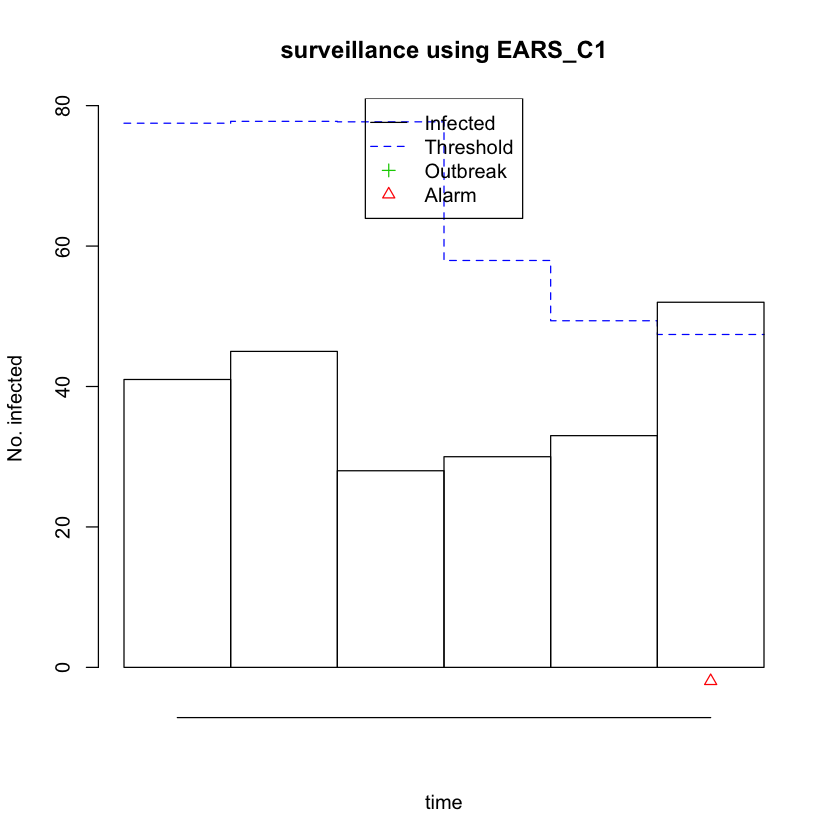

In [43]:
plot(monitored_salmonella2014)

In [44]:
monitored_salmonella2014_df <- as.data.frame(monitored_salmonella2014)
knitr::kable(monitored_salmonella2014_df)



| observed|epoch      |state |alarm | upperbound| population| freq| epochInPeriod|
|--------:|:----------|:-----|:-----|----------:|----------:|----:|-------------:|
|       41|2014-11-24 |FALSE |FALSE |   77.49711|          1|   52|     0.9230769|
|       45|2014-12-01 |FALSE |FALSE |   77.76490|          1|   52|     0.9423077|
|       28|2014-12-08 |FALSE |FALSE |   77.69343|          1|   52|     0.9615385|
|       30|2014-12-15 |FALSE |FALSE |   57.94745|          1|   52|     0.9807692|
|       33|2014-12-22 |FALSE |FALSE |   49.36379|          1|   52|     1.0000000|
|       52|2014-12-29 |FALSE |TRUE  |   47.40856|          1|   52|     0.0192308|